In [1]:
import tensorflow as tf

In [2]:
# tf.Graph.__init__() #创建一个空图

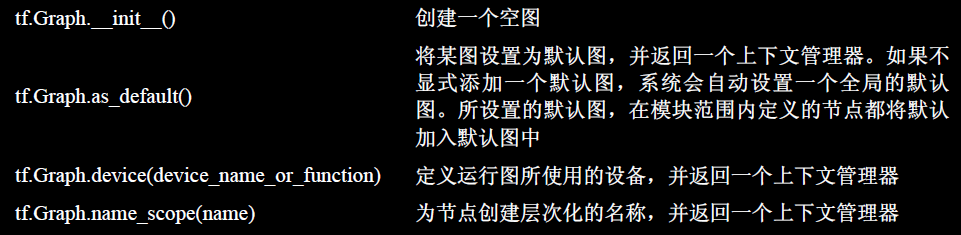 

## 可视化
在第3 章中，我们讲解了可视化面板的功能，但如何编写可视化的程序呢？可视化时，需
要在程序中给必要的节点添加摘要（summary），摘要会收集该节点的数据，并标记上第几步、时
间戳等标识，写入事件文件（event file）中。tf.summary.FileWriter 类用于在目录中创建事件文件，
并且向文件中添加摘要和事件，用来在TensorBoard 中展示。9.3 节将详细讲解可视化的过程。
表4-6 给出了可视化常用的API 操作。

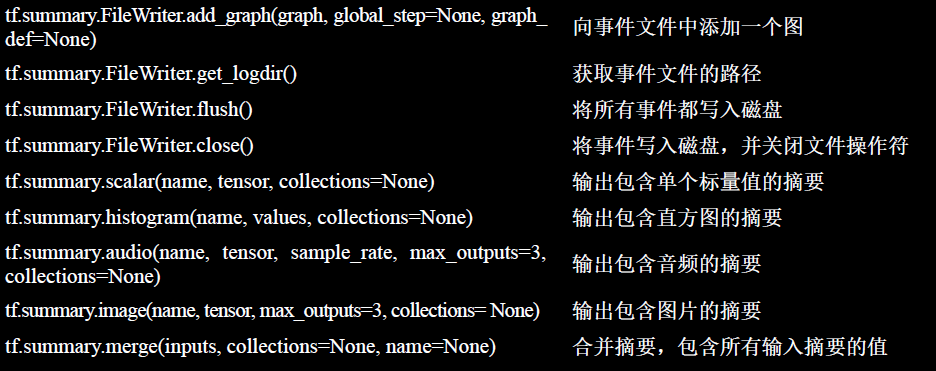
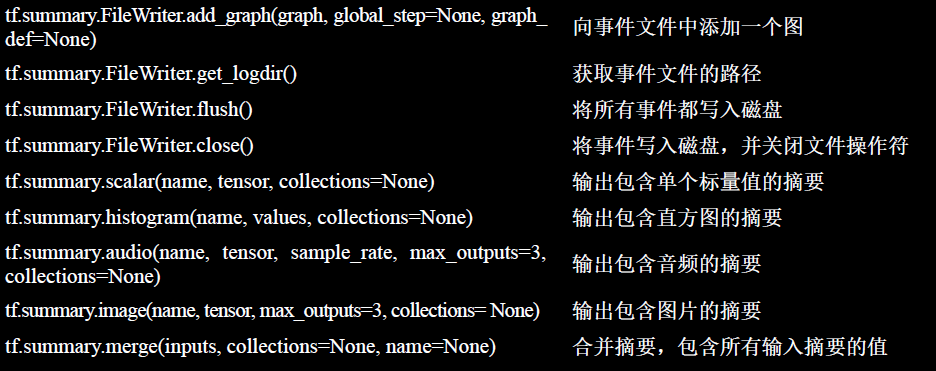

In [3]:
with tf.variable_scope('foo') as foo_scope:
    assert foo_scope.name == 'foo'

In [4]:
with tf.variable_scope('bar'):
    with tf.variable_scope('baz') as other_scope:
        assert other_scope.name == 'bar/baz'
        with tf.variable_scope(foo_scope) as foo_scope2:
            assert foo_scope2.name == 'foo'

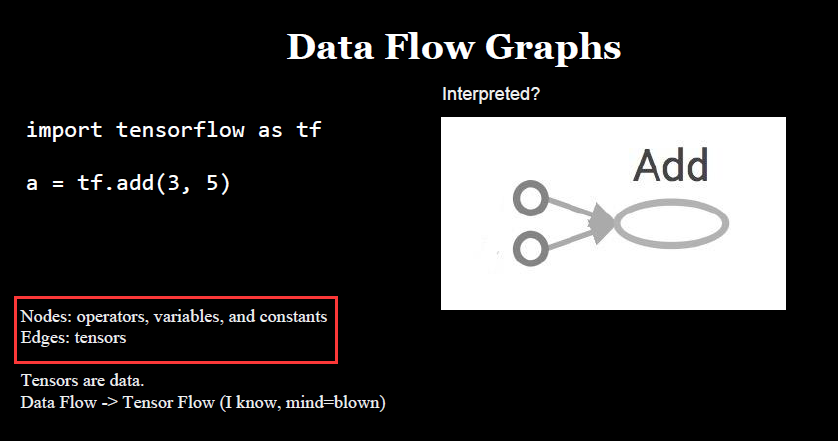

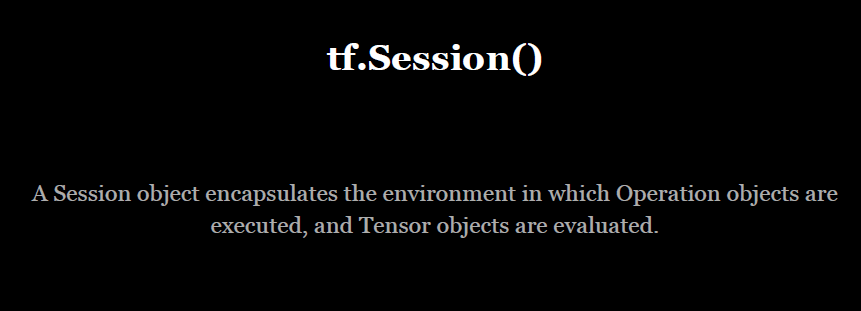

In [6]:
x = tf.constant(2)
y = tf.constant(3)
op1 = tf.multiply(x, y)
op2 = tf.add(x, y)
op3 = tf.pow(op1, op2)
with tf.Session() as sess:
    sess.run(op3)

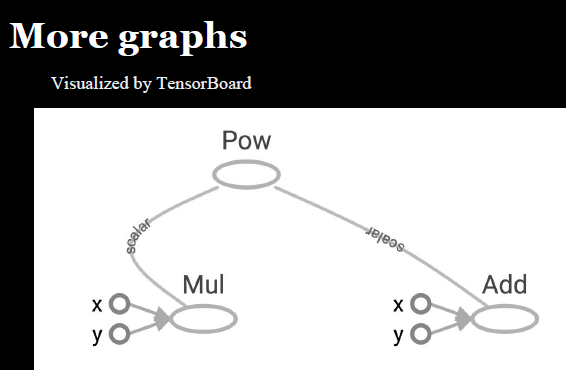

In [8]:
# x = 2
# y = 3
# add_op = tf.add(x, y)
# mul_op = tf.multiply(x, y)
# pow_op = tf.pow(add_op, mul_op)
# useless = tf.multiply(x, add_op)
# with tf.Session as sess:
#     z, not_useless = sess.run([op3, useless])

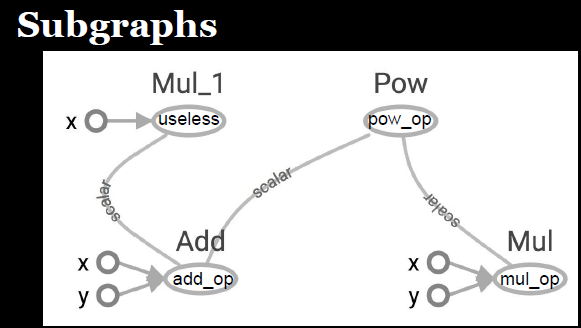

创建一个Graph

In [9]:
g = tf.Graph()

In [14]:
with g.as_default():
    a = 3
    b = 5
    x = tf.add(a, b)

In [15]:
sess = tf.Session(graph=g) # session is run on the graph g
# with tf.Session() as sess:
sess.run(x)

8

To handle the default graph:

In [16]:
g = tf.get_default_graph()

Do not mix default graph and user created graphs

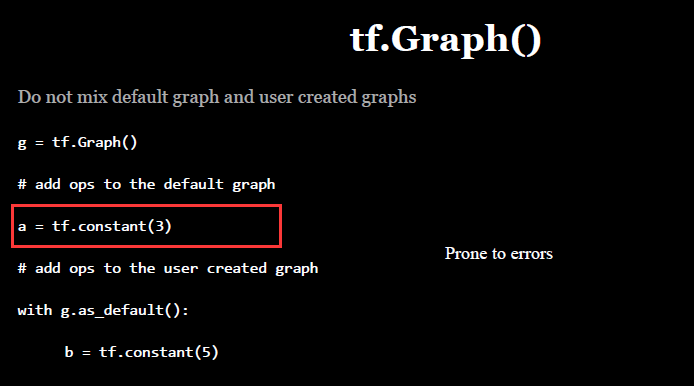

In [20]:
g1 = tf.get_default_graph()
g2 = tf.Graph()

In [18]:
with g1.as_default():
    a = tf.constant(3)

In [21]:
with g2.as_default():
    b = tf.constant(5)

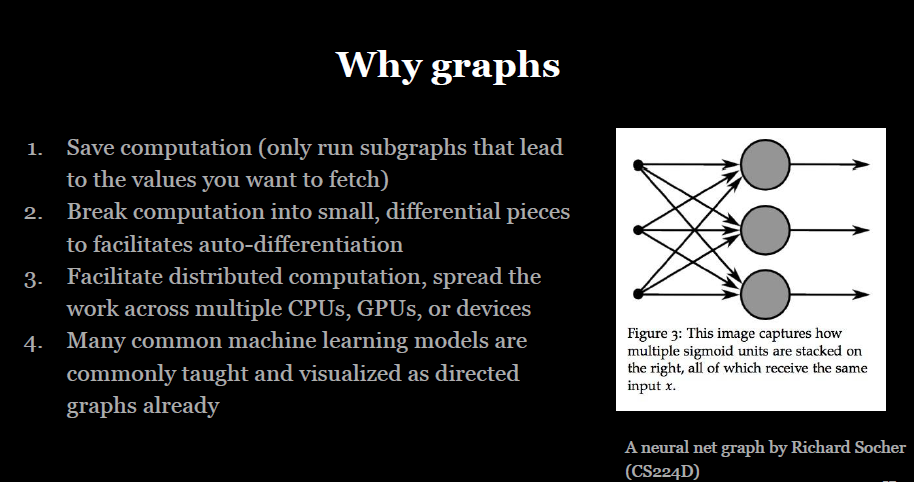

In [26]:
a = tf.constant(2)
b = tf.constant(3)
x = tf.add(a, b)

In [28]:
with tf.Session() as sess:
    # add this line to use TensorBoard.
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(x))
writer.close() # close the writer when you’re done using it

5


In [31]:
a = tf.constant([[3,3]])
b = tf.constant([[2], [4]])
mat_mul = tf.matmul(a, b)

In [33]:
with tf.Session() as sess:
    result = sess.run(mat_mul)
    print(result)

[[18]]
